<a href="https://colab.research.google.com/github/aadharkulshrestha/PRO-C119-DECISION-TREE/blob/main/Desicision%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving as.csv to as.csv


In [22]:
import pandas as pd

col_names = ['PassengerId','Pclass','Sex,Age','SibSp','Parch','Survived']

df = pd.read_csv("as.csv", names=col_names).iloc[1:]

print(df.head())

  PassengerId Pclass Sex,Age SibSp Parch Survived
1           3      1    34.5     1     0        0
2           1      0      47     1     0        1
3           3      0      62     0     0        1
4           1      0      27     1     0        1
5           3      1      22     0     0        0


In [24]:
features = ['PassengerId','Pclass','Sex,Age','SibSp','Parch','Survived']
X= df[features]
y= df.Survived

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [26]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])

print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<Survived &le; 0.5<br/>gini = 0.495<br/>samples = 20<br/>value = [11, 9]<br/>class = 0>, fillcolor="#fae8db"] ;
1 [label=<gini = 0.0<br/>samples = 11<br/>value = [11, 0]<br/>class = 0>, fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<gini = 0.0<br/>samples = 9<br/>value = [0, 9]<br/>class = 1>, fillcolor="#399de5"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


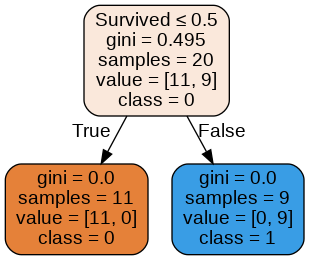

In [27]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [28]:
clf = DecisionTreeClassifier(max_depth=3)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


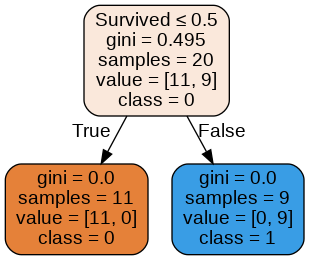

In [29]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())